In [0]:
import pickle
model = pickle.load(open('drive/My Drive/models/F4_ver2.ipynb','rb'))

In [0]:
#Train
import keras
import tensorflow as tf

class My_Custom_Generator4(keras.utils.Sequence) :
  
  def __init__(self, images, labels, sequences, batch_size,valid) :
    self.images = images
    self.labels = labels
    self.sequences = sequences
    self.batch_size = batch_size
    self.out_test = np.empty((self.batch_size,self.sequences,224,224,3))
    self.out_label= np.zeros(shape=(self.batch_size,self.sequences,1),dtype="float32")
    self.value = 0
    self.valid = valid
    
  def __len__(self) :
    return self.valid
    #return 2
  
  def __getitem__(self, idx) :


    batch_x = self.images[0 : self.sequences]
    batch_y = self.labels[0 : self.sequences]

    self.out_test[0] = batch_x
    self.out_label[0] = batch_y
    
    #print("iter=",iter)
      #for j in range (0,self.sequences):
        #cv2_imshow(batch_x[j])
       # print(batch_y[j])

      

    return self.out_test,self.out_label


In [0]:
import sys
import os
import time
import random
import imageio
!pip install dill
import dill
import pickle
import PIL
from PIL import Image

import numpy as np

from scipy import misc

BACKEND = "tensorflow"

!pip install scipy

os.environ['KERAS_BACKEND'] = BACKEND
os.environ['THEANO_FLAGS'] = "device=gpu0, lib.cnmem=0.85, optimizer=fast_run"

import cv2

from google.colab.patches import cv2_imshow

t_a = []
t_f_vid_arr = []

for k in range(1,2):

    #vid_path = 'v' + str(k) + ".avi"
    vid_path = "drive/My Drive/testing_videos_mp6/Project6-vid5.avi"
    #vid_path = "drive/My Drive/test_actions.mp4"
    #vid_path = "drive/My Drive/bl/e46.avi"  #Your Video path here
    #vid_path = "drive/My Drive/Perfect_Train/v701.avi"
    print(vid_path)
    cap = cv2.VideoCapture(vid_path)

    num_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    fps = cap.get(cv2.CAP_PROP_FPS)

    print ("num_frames=",num_frames)

    t_vid_arr = np.zeros(shape=(num_frames,224,224,3), dtype="uint8")
    
    t_a.append(num_frames)

    #zero_arr = np.zeros(shape=(240, 320, 3), dtype="uint8")
    
    i=0
    for i in range(num_frames):
        
        if i % (num_frames / 10) == 0:
           print ("Video loading is {0}% done.".format((i / (num_frames / 10) * 10)))

        ret, frame = cap.read()
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        #cv2_imshow(frame)
        
        if frame.shape != t_vid_arr.shape :
          frame = cv2.resize(frame, dsize=(224,224), interpolation = cv2.INTER_CUBIC)

      
        t_vid_arr = frame
        #t_vid_arr = np.divide(frame,float(255))
        t_f_vid_arr.append(t_vid_arr)


drive/My Drive/testing_videos_mp6/Project6-vid5.avi
num_frames= 79
Video loading is 0.0% done.


In [0]:
print(len(t_f_vid_arr))

300


In [0]:
if(num_frames != (int(num_frames/25)*25)):
  upper_bound = int(num_frames/25) + 1

zer_arr = np.zeros(shape=(1,224,224,3), dtype="uint8")
append = upper_bound*25 - num_frames

for i in range(0,append):
  t_f_vid_arr.append(zer_arr)

print(len(t_f_vid_arr))


100


In [0]:
labels= np.zeros(shape=(len(t_f_vid_arr),1),dtype="float32")
b = np.zeros(shape=(len(t_f_vid_arr), 224, 224, 3), dtype="uint8")

print(b.shape)
print(len(t_f_vid_arr))

for i in range(0,len(t_f_vid_arr)):
  b[i] = t_f_vid_arr[i]


print(b.shape)
print(labels.shape)



(100, 224, 224, 3)
100
(100, 224, 224, 3)
(100, 1)


In [0]:
output_labels = []

for i in range (0,169): 
  my_test = My_Custom_Generator4(b[i*25:(i+1)*25],labels[i*25:(i+1)*25],25,1,1)
  k = model.predict(my_test)

  print(k.shape)
  for j in range (0,25):

    print(k[0][j])
    output_labels.append(k[0][j])
    #cv2_imshow(b[i*25+j])

  


(1, 25, 1)
[0.01244225]
[0.00463885]
[0.00406594]
[0.0040989]
[0.00391865]
[0.0039421]
[0.0033901]
[0.00364075]
[0.00283659]
[0.00362341]
[0.00408376]
[0.00383192]
[0.00334428]
[0.00305601]
[0.00292495]
[0.00336539]
[0.00297845]
[0.00323133]
[0.00331414]
[0.00306228]
[0.0032284]
[0.00254846]
[0.00277028]
[0.00256551]
[0.00289087]
(1, 25, 1)
[0.00889017]
[0.00299466]
[0.00268775]
[0.00255514]
[0.00251996]
[0.00240114]
[0.00237585]
[0.00278833]
[0.00289312]
[0.00280203]
[0.00286539]
[0.00265399]
[0.00247896]
[0.00277106]
[0.00294993]
[0.0028995]
[0.00241188]
[0.0024436]
[0.00262665]
[0.00227575]
[0.00227184]
[0.00217203]
[0.00227448]
[0.00212472]
[0.00249407]
(1, 25, 1)
[0.00787856]
[0.00308864]
[0.00284229]
[0.00223902]
[0.00207532]
[0.00191203]
[0.00189491]
[0.0024817]
[0.00183445]
[0.00206337]
[0.00254723]
[0.00254017]
[0.00233457]
[0.00263409]
[0.00269494]
[0.00263858]
[0.00254686]
[0.00258214]
[0.00264376]
[0.0031568]
[0.00266614]
[0.00249571]
[0.00267015]
[0.00259975]
[0.00249019]


ValueError: ignored

In [0]:
for i in range (4170,4190):
  cv2_imshow(b[i])

In [0]:
print(len(output_labels))
print(labels.shape)
print(output_labels[0])
for i in range(0,len(t_f_vid_arr)):
  labels[i] = output_labels[i]

100
(175, 1)
[0.00796438]


IndexError: ignored

In [0]:
for i in range (num_frames):
  print(labels[i])

30.0


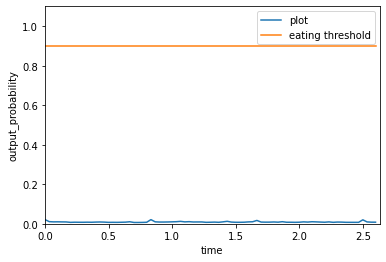

["Eating", [0.0, 0.021376507356762886], [0.03333333333333333, 0.010905217379331589], [0.06666666666666667, 0.00976028386503458], [0.1, 0.0100074652582407], [0.13333333333333333, 0.009590161964297295], [0.16666666666666666, 0.009355947375297546], [0.2, 0.007331830449402332], [0.23333333333333334, 0.008012290112674236], [0.26666666666666666, 0.007784254848957062], [0.3, 0.007705361116677523], [0.3333333333333333, 0.008130017668008804], [0.36666666666666664, 0.00779534550383687], [0.4, 0.008653908036649227], [0.43333333333333335, 0.009160710498690605], [0.4666666666666667, 0.008497066795825958], [0.5, 0.0072698635049164295], [0.5333333333333333, 0.00749968783929944], [0.5666666666666667, 0.007285410072654486], [0.6, 0.007801119238138199], [0.6333333333333333, 0.00832234788686037], [0.6666666666666666, 0.01034073531627655], [0.7, 0.006715312600135803], [0.7333333333333333, 0.006715427618473768], [0.7666666666666667, 0.0070091597735881805], [0.8, 0.007714996114373207], [0.8333333333333334, 

In [0]:
import matplotlib.pyplot as plt
import json
c = []
l= []
eat = []
a_list = []

a_list.append("Eating")

print(fps)
for i in range (0,num_frames):
  c.append(i/fps)
  eat.append(0.9)
  l.append(labels[i])
  a_list.append([float((i/fps)),float(l[i])])


plt.xlim(0,num_frames/fps)
plt.ylim(0,1.1)

plt.xlabel('time')
plt.ylabel('output_probability')

plt.plot(c,l,label='plot')
plt.plot(c,eat,label='eating threshold')

plt.savefig("vid5.png")

plt.legend()
plt.show()



y=json.dumps(a_list)
with open ('vid5.json', 'w') as json_file:
  json.dump(y,json_file)


print(y)

In [0]:
#Model 2
!pip install tensorflow==1.14.0
import keras
from keras.layers import Dense, LSTM, Flatten, TimeDistributed, Conv2D, Dropout, ELU
from keras.layers.advanced_activations import LeakyReLU
from keras import Sequential
from keras.applications.vgg16 import VGG16
from keras import optimizers,regularizers
from keras.layers.advanced_activations import LeakyReLU

vgg = VGG16(
    include_top=False,
    weights='imagenet',
    input_shape=(224, 224, 3)
    )

for layer in vgg.layers[:-4]:
    layer.trainable = False
  
model = Sequential()
model.add(
    TimeDistributed(vgg, input_shape=(25, 224, 224, 3))
)


model.add(TimeDistributed(Flatten()))

model.add(LSTM(256, return_sequences=True))
model.add(ELU(alpha=0.1))

model.add(Dense(64))
model.add(ELU(alpha=0.1))

model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=optimizers.SGD(lr=1e-4, momentum=0.9, decay=1e-4),metrics=['accuracy'])
#model.compile(loss='binary_crossentropy',optimizer=optimizers.Adam(lr=0.001,beta_1=0.9,beta_2=0.999),metrics=['accuracy'])
#model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
model.summary()

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_1 (TimeDist (None, 25, 7, 7, 512)     14714688  
_________________________________________________________________
time_distributed_2 (TimeDist (None, 25, 25088)         0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 25, 256)           25953280  
_________________________________________________________________
elu_1 (ELU)                  (None, 25, 256)           0         
_________________________________________________________________
dense_1 (Dense)              (None, 25, 64)            16448     
_________________________________________________________________
elu_2 (ELU)                  (None, 25, 64)            0         
_________________________